# 행정구역데이터분석

## 데이터 준비 및 탐색

### 공공보건의료기관 현황 데이터 준비하기

In [ ]:
import pandas as pd

import numpy as np

data = pd.read_csv('../assets/공공보건의료기관현황.csv', index_col = 0, encoding = 'CP949', engine = 'python')

data.head() #작업 확인용 출력

,시군구,기관유형,상위 보건기관명,보건기관명,주소,읍면동명,도서지역 여부,대표 전화번호
시도,,,,,,,,
서울특별시,종로구,보건소,종로구보건소,종로구보건소,"서울특별시 종로구 자하문로19길 36 (옥인동, 종로구보건소, 청운효자동자치회관) ...",청운효자동,아니오,02-2148-3514
서울특별시,중구,보건소,서울중구보건소,서울중구보건소,"서울특별시 중구 다산로39길 16 (무학동, 중구보건소)",신당동,아니오,02-3396-6302
서울특별시,중구,일반보건지소,서울중구보건소,약수보건지소,"서울특별시 중구 다산로 92 (신당동, 약수동주민센터) 약수동주민센터",신당동,아니오,02-3396-6964
서울특별시,중구,일반보건지소,서울중구보건소,황학보건지소,"서울특별시 중구 난계로11길 52 (황학동, 황학동주민센터) 황학동주민센터",황학동,아니오,02-3396-6989
서울특별시,중구,일반보건지소,서울중구보건소,다산보건지소,"서울특별시 중구 동호로15길 50 (신당동, 동사무소어린이집)",신당동,아니오,02-3396-6959


In [6]:
# 주소에서 시도, 군구 정보 분리
addr = pd.DataFrame( data['주소'].apply(lambda v: v.split()[:2]).tolist(), columns = ('시도', '군구'))

addr.head() #작업 확인용 출력

,시도,군구
0,서울특별시,종로구
1,서울특별시,중구
2,서울특별시,중구
3,서울특별시,중구
4,서울특별시,중구


### - 시도 데이터 보정

In [12]:
addr['시도'].unique()

array(['서울특별시', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도',
       '세종특별자치시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '경기도', '강원특별자치도'], dtype=object)

In [16]:
addr_aliases = {'강원도':'강원특별자치도'}

In [17]:
addr['시도'] = addr['시도'].apply(lambda v: addr_aliases.get(v, v))

In [18]:
addr['시도'].unique()

array(['서울특별시', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도',
       '세종특별자치시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '경기도', '강원특별자치도'], dtype=object)

### - 군구 데이터 보정

In [19]:
addr['군구'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', '청주시', '충주시',
       '제천시', '보은군', '옥천군', '영동군', '증평군', '진천군', '괴산군', '음성군', '단양군',
       '천안시', '공주시', '보령시', '아산시', '서산시', '논산시', '계룡시', '당진시', '금산군',
       '부여군', '서천군', '청양군', '홍성군', '예산군', '태안군', '전주시', '군산시', '익산시',
       '정읍시', '남원시', '김제시', '완주군', '진안군', '무주군', '장수군', '임실군', '순창군',
       '고창군', '부안군', '목포시', '여수시', '순천시', '나주시', '광양시', '담양군', '곡성군',
       '구례군', '고흥군', '보성군', '화순군', '장흥군', '강진군', '해남군', '영암군', '무안군',
       '함평군', '영광군', '장성군', '완도군', '진도군', '신안군', '포항시', '경주시', '김천시',
       '안동시', '구미시', '영주시', '영천시', '상주시', '문경시', '경산시', '군위군', '의성군',
       '청송군', '영양군', '영덕군', '청도군', '고령군', '성주군', '칠곡군', '예천군', '봉화군',
       '울진군', '울릉군', '창원시', '진주시', '통영시', '사천시', '김해시', '밀양시', '거제시',
       '양산시', '의령군', '함안군', '창녕군', '고성군', '남해군', '하동군', '산청군', '함양군',
       '거창군', '합천군

### 행정구역별 공공보건의료기관의 수 구하기

In [20]:
addr['시도군구'] = addr.apply(lambda r: r['시도'] + ' ' + r['군구'], axis = 1)
addr.head() #작업 확인용 출력

,시도,군구,시도군구
0,서울특별시,종로구,서울특별시 종로구
1,서울특별시,중구,서울특별시 중구
2,서울특별시,중구,서울특별시 중구
3,서울특별시,중구,서울특별시 중구
4,서울특별시,중구,서울특별시 중구


In [21]:
addr['count'] = 0
addr.head() #작업 확인용 출력

,시도,군구,시도군구,count
0,서울특별시,종로구,서울특별시 종로구,0
1,서울특별시,중구,서울특별시 중구,0
2,서울특별시,중구,서울특별시 중구,0
3,서울특별시,중구,서울특별시 중구,0
4,서울특별시,중구,서울특별시 중구,0


In [22]:
addr_group = pd.DataFrame( addr.groupby(['시도', '군구', '시도군구'], as_index = False).count())
addr_group.head() #작업 확인용 출력

,시도,군구,시도군구,count
0,강원특별자치도,강릉시,강원특별자치도 강릉시,19
1,강원특별자치도,고성군,강원특별자치도 고성군,14
2,강원특별자치도,동해시,강원특별자치도 동해시,4
3,강원특별자치도,삼척시,강원특별자치도 삼척시,15
4,강원특별자치도,속초시,강원특별자치도 속초시,1


In [23]:
addr_group = addr_group.set_index("시도군구")
addr_group.head() #작업 확인용 출력

,시도,군구,count
시도군구,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,19
강원특별자치도 고성군,강원특별자치도,고성군,14
강원특별자치도 동해시,강원특별자치도,동해시,4
강원특별자치도 삼척시,강원특별자치도,삼척시,15
강원특별자치도 속초시,강원특별자치도,속초시,1


### 행정구역별 인구수 데이터 준비하기

In [50]:
population = pd.read_excel('data/행정구역_시군구_별_성별_인구수_2.xlsx')
population.head() #작업 확인용 출력

,행정구역(시군구)별(1),행정구역(시군구)별(2),총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,합계,51183336,25479498,25703838
1,서울특별시,소계,9335734,4504618,4831116
2,서울특별시,종로구,138184,66450,71734
3,서울특별시,중구,119850,57734,62116
4,서울특별시,용산구,203405,97137,106268


In [51]:
population = population.rename(columns = {'행정구역(시군구)별(1)': '시도', '행정구역(시군구)별(2)': '군구'})
population.head() #작업 확인용 출력

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,합계,51183336,25479498,25703838
1,서울특별시,소계,9335734,4504618,4831116
2,서울특별시,종로구,138184,66450,71734
3,서울특별시,중구,119850,57734,62116
4,서울특별시,용산구,203405,97137,106268


In [58]:
population['군구'] = population['군구'].apply(lambda x: x.strip() if isinstance(x, str) else x)

In [59]:
# addr['시도군구'] = addr.apply(lambda r: r['시도'] + ' ' + r['군구'], axis = 1)
population['시도군구'] = population.apply(lambda r: r['시도'] + ' ' + r['군구'], axis = 1)
population.head() #작업 확인용 출력

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명),시도군구
0,전국,합계,51183336,25479498,25703838,전국 합계
1,서울특별시,소계,9335734,4504618,4831116,서울특별시 소계
2,서울특별시,종로구,138184,66450,71734,서울특별시 종로구
3,서울특별시,중구,119850,57734,62116,서울특별시 중구
4,서울특별시,용산구,203405,97137,106268,서울특별시 용산구


In [27]:
population = population[population.군구 != '합계']
population = population[population.군구 != '소계']

In [63]:
population = population.set_index("시도군구")
population.head() #작업 확인용 출력

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
시도군구,,,,,
전국 합계,전국,합계,51183336,25479498,25703838
서울특별시 소계,서울특별시,소계,9335734,4504618,4831116
서울특별시 종로구,서울특별시,종로구,138184,66450,71734
서울특별시 중구,서울특별시,중구,119850,57734,62116
서울특별시 용산구,서울특별시,용산구,203405,97137,106268


In [64]:
addr_population_merge = pd.merge(addr_group,population, how = 'inner', left_index = True, right_index = True)
addr_population_merge.head() #작업 확인용 출력

,시도_x,군구_x,count,시도_y,군구_y,총인구수 (명),남자인구수 (명),여자인구수 (명)
시도군구,,,,,,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,19,강원특별자치도,강릉시,207274,102731,104543
강원특별자치도 고성군,강원특별자치도,고성군,14,강원특별자치도,고성군,26812,13742,13070
강원특별자치도 동해시,강원특별자치도,동해시,4,강원특별자치도,동해시,87138,44238,42900
강원특별자치도 삼척시,강원특별자치도,삼척시,15,강원특별자치도,삼척시,61552,31366,30186
강원특별자치도 속초시,강원특별자치도,속초시,1,강원특별자치도,속초시,80372,39657,40715


In [65]:
local_MC_Population = addr_population_merge[ ['시도_x', '군구_x','count', '총인구수 (명)']]
local_MC_Population.head() #작업 확인용 출력

,시도_x,군구_x,count,총인구수 (명)
시도군구,,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,19,207274
강원특별자치도 고성군,강원특별자치도,고성군,14,26812
강원특별자치도 동해시,강원특별자치도,동해시,4,87138
강원특별자치도 삼척시,강원특별자치도,삼척시,15,61552
강원특별자치도 속초시,강원특별자치도,속초시,1,80372


In [66]:
#컬럼 이름 변경
local_MC_Population = local_MC_Population.rename(columns = {'시도_x':'시도', '군구_x': '군구','총인구수 (명)': '인구수'})
MC_count = local_MC_Population['count']
local_MC_Population['MC_ratio'] = MC_count.div(local_MC_Population['인구수'], axis = 0)*100000

local_MC_Population.head() #작업 확인용 출력

,시도,군구,count,인구수,MC_ratio
시도군구,,,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,19,207274,9.166610
강원특별자치도 고성군,강원특별자치도,고성군,14,26812,52.215426
강원특별자치도 동해시,강원특별자치도,동해시,4,87138,4.590420
강원특별자치도 삼척시,강원특별자치도,삼척시,15,61552,24.369639
강원특별자치도 속초시,강원특별자치도,속초시,1,80372,1.244214


## 분석 모델 구축 및 시각화

### 바 차트 그리기

In [68]:
from matplotlib import pyplot as plt
from matplotlib import rcParams, style
style.use('ggplot')

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties( fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

### 행정구역별 공공보건의료기관 수 바 차트

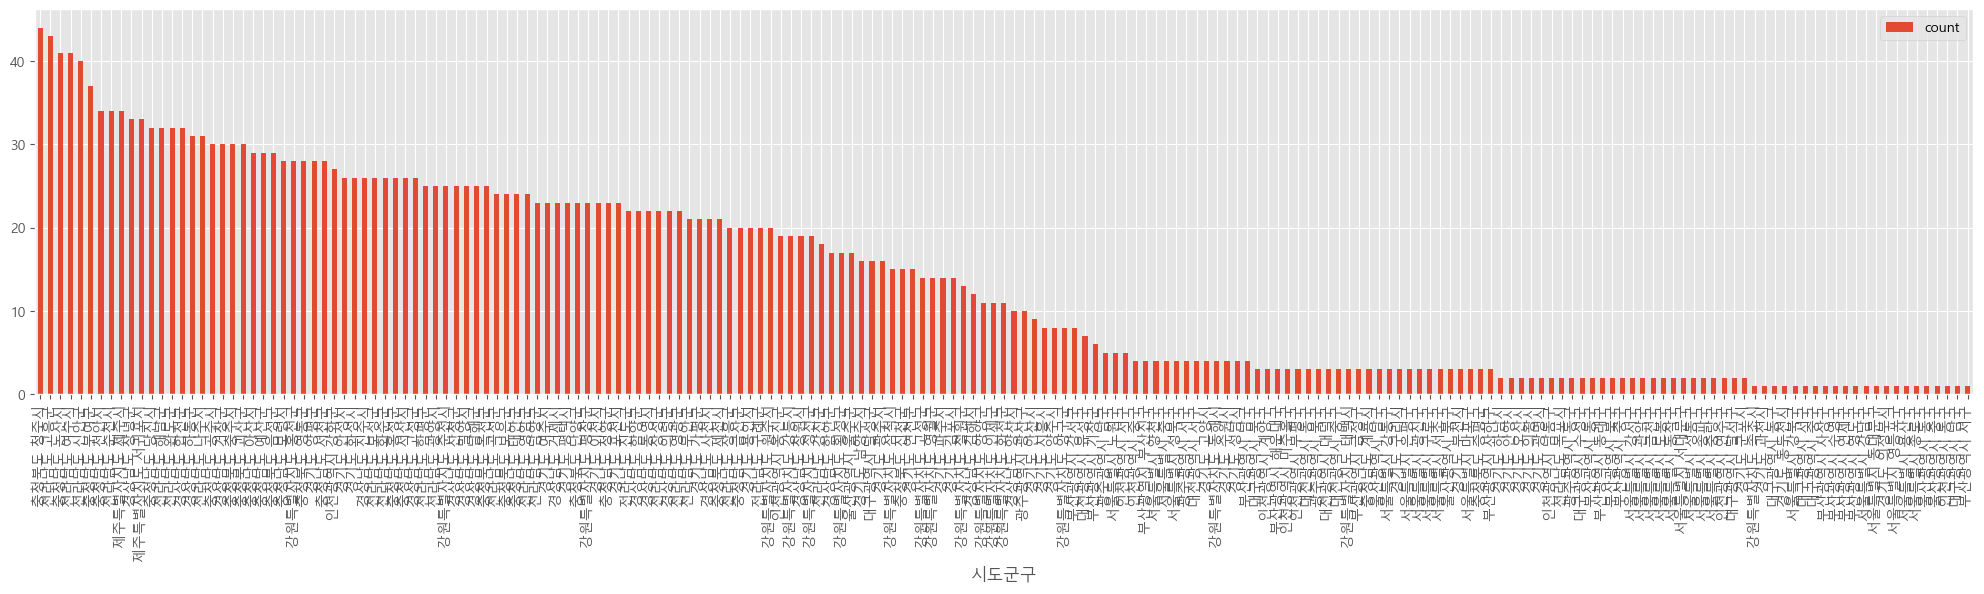

In [69]:
MC_ratio = local_MC_Population[['count']]
MC_ratio = MC_ratio.sort_values('count', ascending = False)
plt.rcParams["figure.figsize"] = (25, 5)
MC_ratio.plot(kind = 'bar', rot = 90)
plt.show()

### 행정구역별로 인구수 대비 공공보건의료기관 비율 바 차트

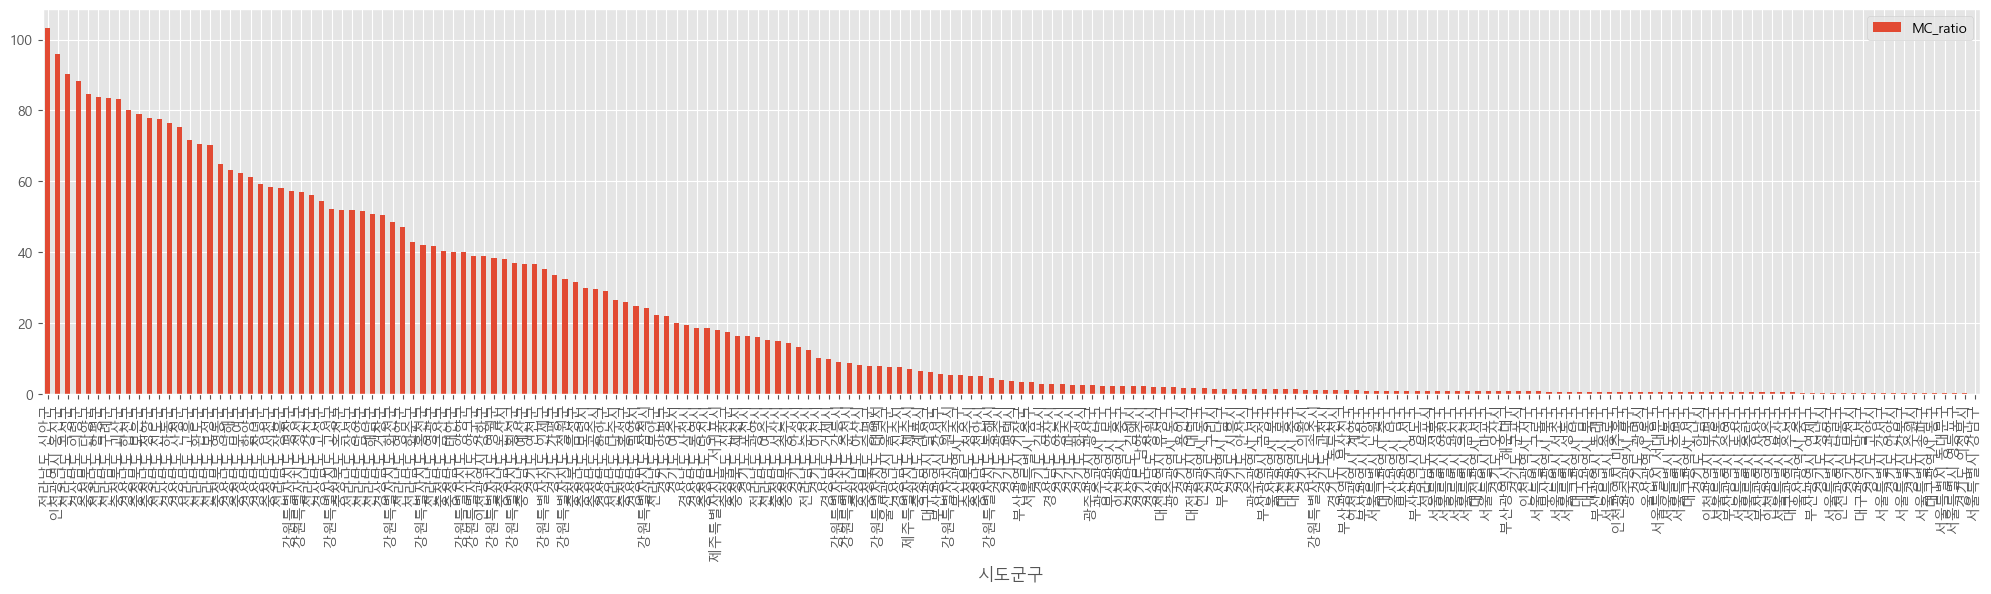

In [70]:
MC_ratio = local_MC_Population[['MC_ratio']]
MC_ratio = MC_ratio.sort_values('MC_ratio', ascending = False)
plt.rcParams["figure.figsize"] = (25, 5)
MC_ratio.plot(kind = 'bar', rot = 90)
plt.show()

## 5.2 블록맵으로 시각화하기

### 데이터 준비하기

In [75]:
data_draw_korea = pd.read_excel('data\\data_draw_korea.xlsx', index_col = 0)
data_draw_korea.head() #작업 확인용 출력

,인구수,shortName,x,y,면적,광역시도,행정구역
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군
2,86747,동해,11,5,180.01,강원도,동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시
4,76733,속초,9,1,105.25,강원도,속초시


In [76]:
#2023년 6월 이후에 변경된 행정구역명으로 수정하기
addr_aliases = { '강원도':'강원특별자치도', '전라북도':'전북특별자치도'}
data_draw_korea['광역시도'] = data_draw_korea['광역시도'].apply(lambda v: addr_aliases.get(v, v))
data_draw_korea.head() #작업 확인용 출력

,인구수,shortName,x,y,면적,광역시도,행정구역
0,202520,강릉,11,4,1040.07,강원특별자치도,강릉시
1,25589,고성(강원),9,0,664.19,강원특별자치도,고성군
2,86747,동해,11,5,180.01,강원특별자치도,동해시
3,63986,삼척,11,8,1185.80,강원특별자치도,삼척시
4,76733,속초,9,1,105.25,강원특별자치도,속초시


### 2. 행정구역 이름 매핑하기

In [80]:
data_draw_korea['시도군구'] = data_draw_korea.apply(lambda r: r['광역시도'] + ' ' + r['행정구역'], axis = 1)

In [81]:
data_draw_korea = data_draw_korea.set_index("시도군구")

data_draw_korea.head() #작업 확인용 출력

,인구수,shortName,x,y,면적,광역시도,행정구역
시도군구,,,,,,,
강원특별자치도 강릉시,202520,강릉,11,4,1040.07,강원특별자치도,강릉시
강원특별자치도 고성군,25589,고성(강원),9,0,664.19,강원특별자치도,고성군
강원특별자치도 동해시,86747,동해,11,5,180.01,강원특별자치도,동해시
강원특별자치도 삼척시,63986,삼척,11,8,1185.80,강원특별자치도,삼척시
강원특별자치도 속초시,76733,속초,9,1,105.25,강원특별자치도,속초시


In [82]:
data_draw_korea_MC_Population_all = pd.merge(data_draw_korea,local_MC_Population, how = 'outer', 
                                             left_index = True, right_index = True)
data_draw_korea_MC_Population_all.head()

,인구수_x,shortName,x,y,면적,광역시도,행정구역,시도,군구,count,인구수_y,MC_ratio
시도군구,,,,,,,,,,,,
강원특별자치도 강릉시,202520.0,강릉,11.0,4.0,1040.07,강원특별자치도,강릉시,강원특별자치도,강릉시,19.0,207274.0,9.166610
강원특별자치도 고성군,25589.0,고성(강원),9.0,0.0,664.19,강원특별자치도,고성군,강원특별자치도,고성군,14.0,26812.0,52.215426
강원특별자치도 동해시,86747.0,동해,11.0,5.0,180.01,강원특별자치도,동해시,강원특별자치도,동해시,4.0,87138.0,4.590420
강원특별자치도 삼척시,63986.0,삼척,11.0,8.0,1185.80,강원특별자치도,삼척시,강원특별자치도,삼척시,15.0,61552.0,24.369639
강원특별자치도 속초시,76733.0,속초,9.0,1.0,105.25,강원특별자치도,속초시,강원특별자치도,속초시,1.0,80372.0,1.244214


### 블록맵으로 시각화하기

In [123]:
BORDER_LINES = [
    [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
    [ (2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9),
    (4, 7), (1, 7)], # 서울
    [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
    (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
    [(9, 12), (9, 10), (8, 10)], # 강원도
    [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
    (13, 4), (14, 4), (14, 2)], # 충청남도
    [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
    (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
    [(14, 4), (15, 4), (15, 6)], # 대전시
    [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
    [(14, 8), (16, 8), (16, 10), (15, 10),
    (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
    [(15, 11), (16, 11), (16, 13)], # 울산시
    [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
    [ (19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], #광주시
    [(18, 5), (20, 5), (20, 6)], # 전라남도
    [ (16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], #부산시
]

In [129]:
def draw_blockMap(blockedMap, targetData, title, color):
    # 값 설정
    vmin = blockedMap[targetData].min()
    vmax = blockedMap[targetData].max()
    whitelabelmin = (vmax - vmin) * 0.25 + vmin
    datalabel = targetData
    
    # 데이터 재구성 및 마스킹
    mapdata = blockedMap.pivot(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    # 시각화
    plt.figure(figsize=(8, 13))
    plt.title(title)
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=color,
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역명 표시
    for idx, row in blockedMap.iterrows():
        # NaN 방지
        if not isinstance(row.get('광역시도'), str) or not isinstance(row.get('행정구역'), str):
            continue
        
        # 라벨 색상 결정
        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'

        # 행정구역 이름 표시 방식 결정
        if row['광역시도'].endswith('시') and not row['광역시도'].startswith('세종'):
            dispname = f" {row['광역시도'][:2]}\n{row['행정구역'][:-1]}"
            if len(row['행정구역']) <= 2:
                dispname += row['행정구역'][-1]
        else:
            dispname = row['행정구역'][:-1]
        
        # 글꼴 크기 조정
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 9.5, 1.5
        else:
            fontsize, linespacing = 11, 1.2

        # 실제 지역 이름 annotate
        plt.annotate(
            dispname,
            (row['x'] + 0.5, row['y'] + 0.5),
            weight='bold',
            fontsize=fontsize,
            ha='center',
            va='center',
            color=annocolor,
            linespacing=linespacing
        )

    # 시도 경계선 그리기
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=4)

    # 시각화 세부 설정
    plt.gca().invert_yaxis()
    plt.axis('off')

    # 컬러바 추가
    cb = plt.colorbar(shrink=1, aspect=10)
    cb.set_label(datalabel)

    # 저장 및 출력
    plt.tight_layout()
    plt.savefig(f'data/blockMap_{targetData}.png')
    plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_17176\773862376.py:63: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cb = plt.colorbar(shrink=1, aspect=10)


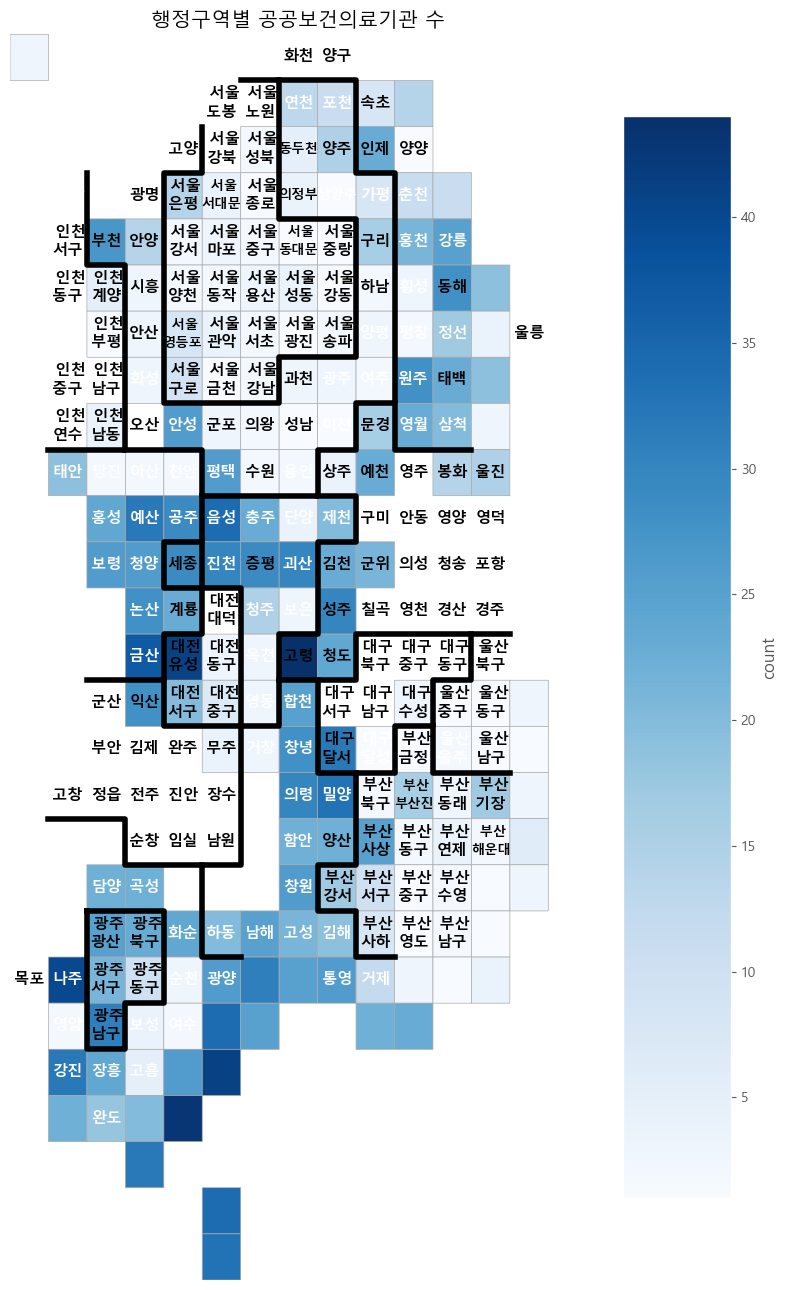

In [130]:
draw_blockMap(data_draw_korea_MC_Population_all, 'count', '행정구역별 공공보건의료기관 수', 'Blues')

C:\Users\USER\AppData\Local\Temp\ipykernel_17176\773862376.py:63: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cb = plt.colorbar(shrink=1, aspect=10)


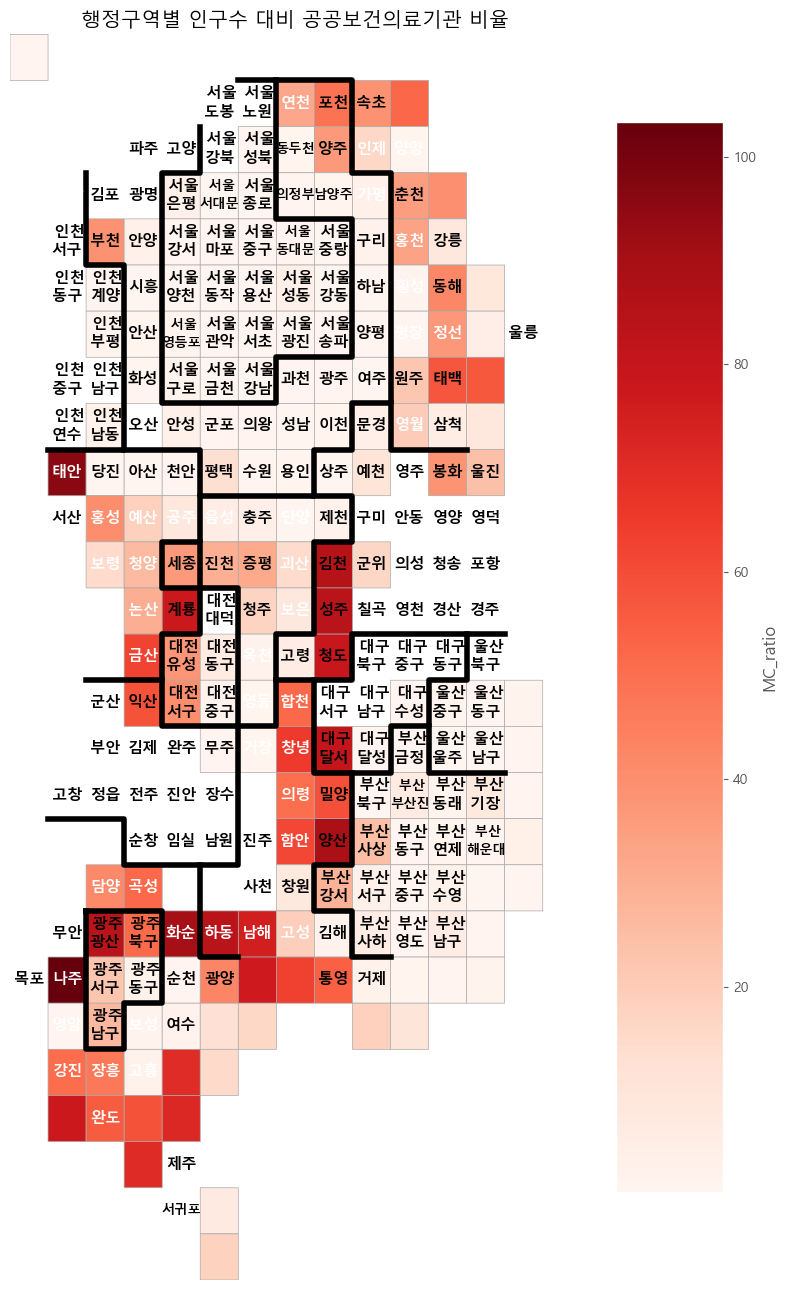

In [131]:
draw_blockMap( data_draw_korea_MC_Population_all, 'MC_ratio', '행정구역별 인구수 대비 공공보건의료기관 비율', 'Reds')